<a href="https://colab.research.google.com/github/Tejaswidarsi/ML-4-Decisiontree/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


###1. Implement Decision Tree Classifier for classification of EnjoySport dataset
a. Load the data set and initialize target column

In [ ]:
def load_data(path):
    return pd.read_csv(path)


b. Create a function for calculating entropy


In [ ]:
def entropy(data):
  if data.empty:
    return 0

  d = data.iloc[:,-1]
  d = d.value_counts()
  s=0
  for v in d.keys():
    p=d[v]/sum(d)
    s-=p*np.log2(p)
  return(s)

c. Create a function for calculating InformationGain

In [ ]:
def IG(data,com):
  total_entropy = entropy(data)
  feature_values = data[com].value_counts()

  weighted_entropy = 0
  total = len(data)

  for value, count in feature_values.items():
      subset = data[data[com] == value]
      subset_entropy = entropy(subset)
      weighted_entropy += (count / total) * subset_entropy

  return total_entropy - weighted_entropy


d. Write code for creating Discission Tree

In [ ]:
class Node:
    def __init__(self, name=None, feature=None):
        self.name = name
        self.feature = feature
        self.children = {}

    def __repr__(self):
        return f"Node(name={self.name}, feature={self.feature})"

# Function to build the Decision Tree
def build_tree(data, used_features):
    if entropy(data) == 0:
        # All instances belong to the same class
        return Node(name=data.iloc[0, -1])  # Leaf node with class label

    best_feature = None
    max_ig = -1

    for feature in data.columns[:-1]:  # Exclude target column
        if feature not in used_features:
            ig = IG(data, feature)
            if ig > max_ig:
                max_ig = ig
                best_feature = feature

    if best_feature is None:
        return None  # No further features to split

    # Create root node with best feature
    root = Node(name=best_feature)
    used_features.append(best_feature)

    # Split data and create child nodes
    feature_values = data[best_feature].unique()
    for value in feature_values:
        subset = data[data[best_feature] == value]
        child_node = build_tree(subset, used_features.copy())
        root.children[value] = child_node

    return root

# Print tree structure
def print_tree(node, level=0):
    if node is None:
        return
    print("  " * level + f"Node: {node.name}")
    for value, child in node.children.items():
        print("  " * (level + 1) + f"Value: {value}")
        print_tree(child, level + 2)

# dataset
path = "/content/Enjoy sports.csv"
data = load_data(path)
tree = build_tree(data, [])
print_tree(tree)

Node: Day
  Value: 1
    Node: No
  Value: 2
    Node: No
  Value: 3
    Node: Yes
  Value: 4
    Node: Yes
  Value: 5
    Node: Yes
  Value: 6
    Node: No
  Value: 7
    Node: Yes
  Value: 8
    Node: No
  Value: 9
    Node: Yes
  Value: 10
    Node: Yes
  Value: 11
    Node: Yes
  Value: 12
    Node: Yes
  Value: 13
    Node: Yes
  Value: 14
    Node: No


###2. Implement Decision Tree Classifier for classification of EnjoySport dataset
a. Load the data set \
b. Use Label Encoding \
c. create a Decision Tree \
d. Visualize the tree \

Dataset:
    Day   Outlook Temp. Humidity    Wind Decision
0     1     Sunny   Hot     High    Weak       No
1     2     Sunny   Hot     High  Strong       No
2     3  Overcast   Hot     High    Weak      Yes
3     4      Rain  Mild     High    Weak      Yes
4     5      Rain  Cool   Normal    Weak      Yes
5     6      Rain  Cool   Normal  Strong       No
6     7  Overcast  Cool   Normal  Strong      Yes
7     8     Sunny  Mild     High    Weak       No
8     9     Sunny  Cool   Normal    Weak      Yes
9    10      Rain  Mild   Normal    Weak      Yes
10   11     Sunny  Mild   Normal  Strong      Yes
11   12  Overcast  Mild     High  Strong      Yes
12   13  Overcast   Hot   Normal    Weak      Yes
13   14      Rain  Mild     High  Strong       No

Encoded Dataset:
    Day  Outlook  Temp.  Humidity  Wind  Decision
0     0        2      1         0     1         0
1     1        2      1         0     0         0
2     2        0      1         0     1         1
3     3        1      2

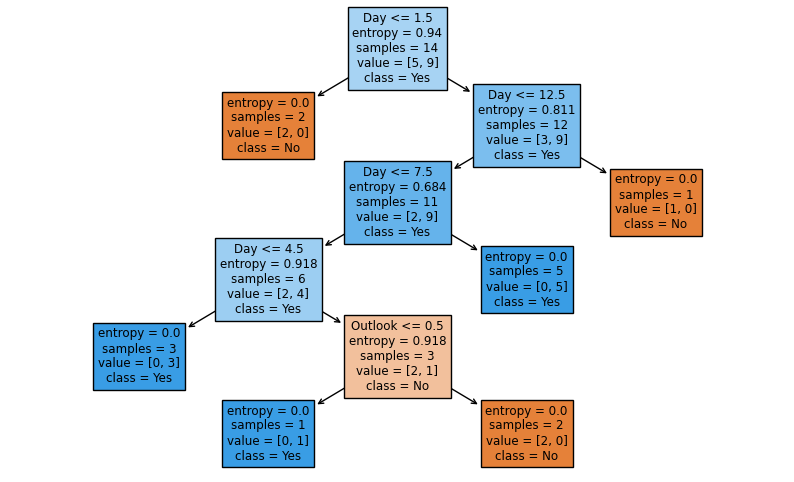

In [ ]:

# Loading the EnjoySport dataset
data = pd.read_csv("/content/Enjoy sports.csv")

df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Label encoding to convert categorical data into numerical data
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

print("\nEncoded Dataset:")
print(df)

# Features and target variable
# Access the target variable using its numerical index (assuming it's the last column)
X = df.drop(df.columns[-1], axis=1)  # Features (all columns except the last one)
y = df.iloc[:, -1]                # Target variable (last column)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(10,6))
# Use numerical column indices for feature_names
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


###3. Implement Decision Tree Classifier for classification of Iris dataset
a. Load the data set \
b. Split the data set to train and test sets \
c. Train a Decision Tree using train set \
d. Test the model using test set. Find accuracy and confusion Matrix.


In [5]:
# Load the Iris dataset
iris = pd.read_csv("/content/iris (1).csv")
# Separate features and target variable
X = iris.drop('Species', axis=1)  # Features (all columns except 'Species')
y = iris['Species']  # Target variable ('Species' column)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
# Test the model and make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Decision Tree Classifier Accuracy: 1.0

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


###4. Implement Random Forest Classifier for classification of Iris dataset
a. Load the data set \
b. Split the data set to train and test sets \
c. Train a Random Forest model using train set \
d. Test the model using test set. Find accuracy and confusion Matrix.

In [6]:

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset (already loaded above)
# Split the data into train and test sets (80% train, 20% test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # This line is redundant as the data is already split

# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)

# Test the model and make predictions
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(conf_matrix_rf)

Random Forest Classifier Accuracy: 1.0

Confusion Matrix (Random Forest):
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
